In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(15.7,8.27)})

In [ ]:
df=pd.read_excel('state_wise_updated (1).xlsx')

In [ ]:
df.head()

,State,Unnamed: 1,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Population,Density,0-4,2020-05-09 00:00:00,2020-10-14 00:00:00,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+,Health Workers(%),Police Force,Vaccination Centres
0,Total,NaN,10169804,9739332,147379,280310,25-12-2020 23:29,2783,TT,22336,22134,251,NaN,1.397322e+09,382.0,112806778.0,126928126.0,132709212.0,120526449.0,111424222.0,101413965.0,88594951.0,85140684.0,72438112.0,62318327.0,49069254.0,39146055.0,37663707.0,26454983.0,19208842.0,9232503.0,11289005.0,NaN,2067270.0,37725.0
1,Maharashtra,NaN,1913382,1806298,49129,56823,25-12-2020 22:43,1132,MH,3431,1427,71,NaN,1.208373e+08,365.0,9362026.0,9820654.0,10734535.0,10627267.0,11090966.0,10147113.0,8796307.0,8247160.0,7196089.0,6032454.0,4919317.0,3885814.0,3642480.0,3078352.0,2143136.0,1062773.0,1180194.0,13.67,213382.0,3239.0
2,Karnataka,NaN,914488,888917,12044,13508,25-12-2020 20:23,19,KA,1005,1102,5,NaN,6.616589e+07,319.0,5046719.0,5241509.0,5736646.0,5827277.0,6052558.0,5771606.0,4698380.0,4695451.0,3826712.0,3519782.0,2699270.0,2142504.0,2060052.0,1520119.0,1061125.0,524426.0,625310.0,5.27,89009.0,2943.0
3,Andhra Pradesh,NaN,880430,869478,7091,3861,25-12-2020 19:09,0,AP,355,354,2,NaN,5.288316e+07,308.0,6284765.0,7304432.0,8201595.0,8093747.0,8132094.0,7799036.0,6584371.0,6507339.0,5399473.0,4657269.0,3657386.0,2909598.0,3199837.0,2167854.0,1519358.0,636989.0,754203.0,7.83,61168.0,1666.0
4,Tamil Nadu,NaN,812142,790965,12048,9129,25-12-2020 19:30,0,TN,1027,1103,12,NaN,7.648154e+07,555.0,5278701.0,5551255.0,6177547.0,6253792.0,6411543.0,6663746.0,5815560.0,5836456.0,5064209.0,4713056.0,3703460.0,3101142.0,2782608.0,1868370.0,1406529.0,710241.0,742010.0,6.72,110186.0,2581.0


In [ ]:
df=df.drop([0],axis=0)

In [ ]:
df["50+"]=df["50-54"]+df["55-59"]

In [ ]:
df.head()


,State,Unnamed: 1,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Population,Density,0-4,2020-05-09 00:00:00,2020-10-14 00:00:00,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+,Health Workers(%),Police Force,Vaccination Centres,50+
1,Maharashtra,NaN,1913382,1806298,49129,56823,25-12-2020 22:43,1132,MH,3431,1427,71,NaN,120837347.0,365.0,9362026.0,9820654.0,10734535.0,10627267.0,11090966.0,10147113.0,8796307.0,8247160.0,7196089.0,6032454.0,4919317.0,3885814.0,3642480.0,3078352.0,2143136.0,1062773.0,1180194.0,13.67,213382.0,3239.0,8805131.0
2,Karnataka,NaN,914488,888917,12044,13508,25-12-2020 20:23,19,KA,1005,1102,5,NaN,66165886.0,319.0,5046719.0,5241509.0,5736646.0,5827277.0,6052558.0,5771606.0,4698380.0,4695451.0,3826712.0,3519782.0,2699270.0,2142504.0,2060052.0,1520119.0,1061125.0,524426.0,625310.0,5.27,89009.0,2943.0,4841774.0
3,Andhra Pradesh,NaN,880430,869478,7091,3861,25-12-2020 19:09,0,AP,355,354,2,NaN,52883163.0,308.0,6284765.0,7304432.0,8201595.0,8093747.0,8132094.0,7799036.0,6584371.0,6507339.0,5399473.0,4657269.0,3657386.0,2909598.0,3199837.0,2167854.0,1519358.0,636989.0,754203.0,7.83,61168.0,1666.0,6566984.0
4,Tamil Nadu,NaN,812142,790965,12048,9129,25-12-2020 19:30,0,TN,1027,1103,12,NaN,76481545.0,555.0,5278701.0,5551255.0,6177547.0,6253792.0,6411543.0,6663746.0,5815560.0,5836456.0,5064209.0,4713056.0,3703460.0,3101142.0,2782608.0,1868370.0,1406529.0,710241.0,742010.0,6.72,110186.0,2581.0,6804602.0
5,Kerala,NaN,732085,664951,2931,64032,25-12-2020 21:52,171,KL,5397,4506,16,NaN,35330888.0,860.0,2453092.0,2555112.0,2822770.0,2610552.0,2665809.0,2604092.0,2455501.0,2579673.0,2412498.0,2348530.0,1928145.0,1742408.0,1414671.0,1002134.0,733372.0,501367.0,541849.0,6.06,48860.0,1297.0,3670553.0


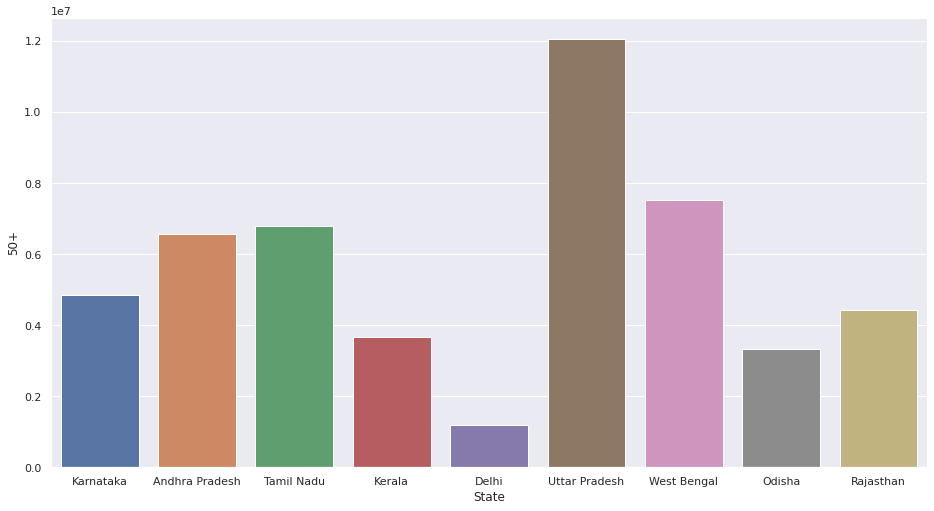

In [ ]:
sns.set(style='darkgrid')
sns.barplot(x='State',
                y='50+',
                data=df.iloc[1:10])

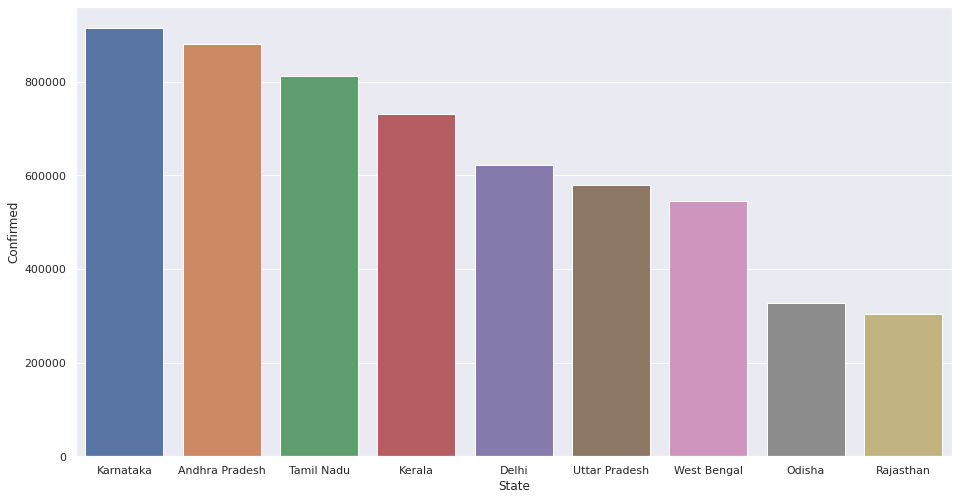

In [ ]:
sns.set(style='darkgrid')
sns.barplot(x='State',
                y='Confirmed',
                data=df.iloc[1:10])

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

In [ ]:
X1=df[['Active','50+','State']].dropna()

In [ ]:
X=X1[['Active','50+']]

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X=X.values

In [ ]:
X

array([[5.6823000e+04, 8.8051310e+06],
       [1.3508000e+04, 4.8417740e+06],
       [3.8610000e+03, 6.5669840e+06],
       [9.1290000e+03, 6.8046020e+06],
       [6.4032000e+04, 3.6705530e+06],
       [7.2670000e+03, 1.1963610e+06],
       [1.6159000e+04, 1.2051169e+07],
       [1.4749000e+04, 7.5265300e+06],
       [2.5830000e+03, 3.3315320e+06],
       [1.1700000e+04, 4.4142570e+06],
       [1.4759000e+04, 1.7823000e+06],
       [4.7500000e+03, 1.7161660e+06],
       [5.3470000e+03, 6.1094180e+06],
       [1.0531000e+04, 4.7521300e+06],
       [1.0461000e+04, 4.7524490e+06],
       [3.4220000e+03, 2.0491880e+06],
       [4.7070000e+03, 2.2110190e+06],
       [3.4140000e+03, 8.0859700e+05],
       [1.5870000e+03, 2.1714150e+06],
       [5.5100000e+03, 7.1561900e+05],
       [4.3470000e+03, 5.9754700e+05],
       [9.8000000e+02, 1.4214500e+05],
       [3.4900000e+02, 1.1103200e+05],
       [1.8400000e+02, 2.7906000e+05],
       [1.3520000e+03, 2.0977600e+05],
       [3.4500000e+02, 8.

In [ ]:
len(X)

34

In [ ]:
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

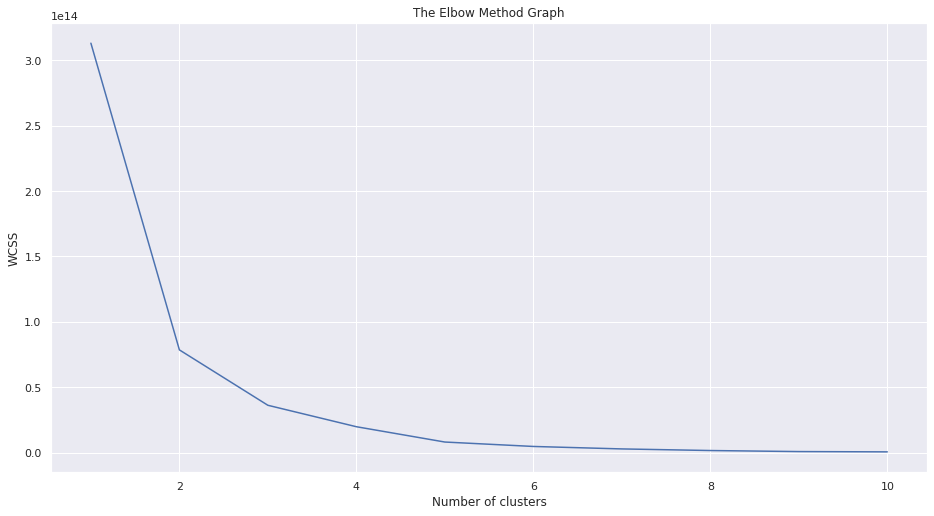

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [ ]:
y_kmeans = kmeans.fit_predict(X)

In [ ]:
type(y_kmeans)

numpy.ndarray

In [ ]:
y_kmeans

array([2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

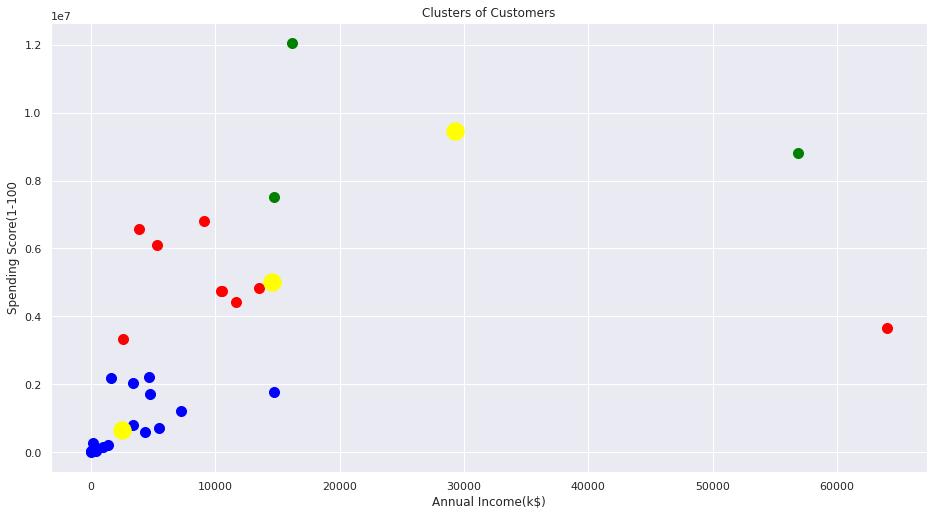

In [ ]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

In [ ]:
 for i in range(len(y_kmeans)):
   print(df['State'].iloc[i:i+1],y_kmeans[i])

1    Maharashtra
Name: State, dtype: object 2
2    Karnataka
Name: State, dtype: object 0
3    Andhra Pradesh
Name: State, dtype: object 0
4    Tamil Nadu
Name: State, dtype: object 0
5    Kerala
Name: State, dtype: object 0
6    Delhi
Name: State, dtype: object 1
7    Uttar Pradesh
Name: State, dtype: object 2
8    West Bengal
Name: State, dtype: object 2
9    Odisha
Name: State, dtype: object 0
10    Rajasthan
Name: State, dtype: object 0
11    Telangana
Name: State, dtype: object 1
12    Chhattisgarh
Name: State, dtype: object 1
13    Haryana
Name: State, dtype: object 0
14    Bihar
Name: State, dtype: object 0
15    Gujarat
Name: State, dtype: object 0
16    Madhya Pradesh
Name: State, dtype: object 1
17    Assam
Name: State, dtype: object 1
18    Punjab
Name: State, dtype: object 1
19    Jammu and Kashmir
Name: State, dtype: object 1
20    Jharkhand
Name: State, dtype: object 1
21    Uttarakhand
Name: State, dtype: object 1
22    Himachal Pradesh
Name: State, dtype: object 1
23   

In [ ]:
X1.reset_index(inplace=True)

In [ ]:
X1

,index,Active,50+,State
0,1,56823,8805131.0,Maharashtra
1,2,13508,4841774.0,Karnataka
2,3,3861,6566984.0,Andhra Pradesh
3,4,9129,6804602.0,Tamil Nadu
4,5,64032,3670553.0,Kerala
5,6,7267,1196361.0,Delhi
6,7,16159,12051169.0,Uttar Pradesh
7,8,14749,7526530.0,West Bengal
8,9,2583,3331532.0,Odisha
9,10,11700,4414257.0,Rajasthan


In [ ]:
active_index=X1[['State']]
active_index.head()

,State
0,Maharashtra
1,Karnataka
2,Andhra Pradesh
3,Tamil Nadu
4,Kerala


In [ ]:
len(y_kmeans)

34

In [ ]:
type(active_index)

pandas.core.frame.DataFrame

In [ ]:
index=pd.DataFrame({'index':y_kmeans})
index

,index
0,2
1,0
2,0
3,0
4,0
5,1
6,2
7,2
8,0
9,0


In [ ]:
len(index)

34

In [ ]:
len(active_index)

34

In [ ]:
active_index=active_index.join(index)

In [ ]:
active_index=active_index.set_index('State')
active_index.head()

,index
State,
Maharashtra,2
Karnataka,0
Andhra Pradesh,0
Tamil Nadu,0
Kerala,0


In [ ]:
active_index.tail()

,index
State,
Sikkim,1
Andaman and Nicobar Islands,1
Mizoram,1
Dadra and Nagar Haveli and Daman and Diu,1
Lakshadweep,1


In [ ]:
active_index.to_json('50plus_index')

In [ ]:
df.head()

,State,Unnamed: 1,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Population,Density,0-4,2020-05-09 00:00:00,2020-10-14 00:00:00,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+,Health Workers(%),Police Force,Vaccination Centres,50+
1,Maharashtra,NaN,1913382,1806298,49129,56823,25-12-2020 22:43,1132,MH,3431,1427,71,NaN,120837347.0,365.0,9362026.0,9820654.0,10734535.0,10627267.0,11090966.0,10147113.0,8796307.0,8247160.0,7196089.0,6032454.0,4919317.0,3885814.0,3642480.0,3078352.0,2143136.0,1062773.0,1180194.0,13.67,213382.0,3239.0,8805131.0
2,Karnataka,NaN,914488,888917,12044,13508,25-12-2020 20:23,19,KA,1005,1102,5,NaN,66165886.0,319.0,5046719.0,5241509.0,5736646.0,5827277.0,6052558.0,5771606.0,4698380.0,4695451.0,3826712.0,3519782.0,2699270.0,2142504.0,2060052.0,1520119.0,1061125.0,524426.0,625310.0,5.27,89009.0,2943.0,4841774.0
3,Andhra Pradesh,NaN,880430,869478,7091,3861,25-12-2020 19:09,0,AP,355,354,2,NaN,52883163.0,308.0,6284765.0,7304432.0,8201595.0,8093747.0,8132094.0,7799036.0,6584371.0,6507339.0,5399473.0,4657269.0,3657386.0,2909598.0,3199837.0,2167854.0,1519358.0,636989.0,754203.0,7.83,61168.0,1666.0,6566984.0
4,Tamil Nadu,NaN,812142,790965,12048,9129,25-12-2020 19:30,0,TN,1027,1103,12,NaN,76481545.0,555.0,5278701.0,5551255.0,6177547.0,6253792.0,6411543.0,6663746.0,5815560.0,5836456.0,5064209.0,4713056.0,3703460.0,3101142.0,2782608.0,1868370.0,1406529.0,710241.0,742010.0,6.72,110186.0,2581.0,6804602.0
5,Kerala,NaN,732085,664951,2931,64032,25-12-2020 21:52,171,KL,5397,4506,16,NaN,35330888.0,860.0,2453092.0,2555112.0,2822770.0,2610552.0,2665809.0,2604092.0,2455501.0,2579673.0,2412498.0,2348530.0,1928145.0,1742408.0,1414671.0,1002134.0,733372.0,501367.0,541849.0,6.06,48860.0,1297.0,3670553.0


In [ ]:
 for i in range(len(y_kmeans)):
   print(df['State'].iloc[i:i+1],y_kmeans[i])

1    Maharashtra
Name: State, dtype: object 2
2    Karnataka
Name: State, dtype: object 0
3    Andhra Pradesh
Name: State, dtype: object 0
4    Tamil Nadu
Name: State, dtype: object 0
5    Kerala
Name: State, dtype: object 0
6    Delhi
Name: State, dtype: object 1
7    Uttar Pradesh
Name: State, dtype: object 2
8    West Bengal
Name: State, dtype: object 2
9    Odisha
Name: State, dtype: object 0
10    Rajasthan
Name: State, dtype: object 0
11    Telangana
Name: State, dtype: object 1
12    Chhattisgarh
Name: State, dtype: object 1
13    Haryana
Name: State, dtype: object 0
14    Bihar
Name: State, dtype: object 0
15    Gujarat
Name: State, dtype: object 0
16    Madhya Pradesh
Name: State, dtype: object 1
17    Assam
Name: State, dtype: object 1
18    Punjab
Name: State, dtype: object 1
19    Jammu and Kashmir
Name: State, dtype: object 1
20    Jharkhand
Name: State, dtype: object 1
21    Uttarakhand
Name: State, dtype: object 1
22    Himachal Pradesh
Name: State, dtype: object 1
23   

In [ ]:
import json

In [ ]:
with open('./50plus_index') as f:
        data = json.load(f)

data     

{'index': {'Andaman and Nicobar Islands': 1,
  'Andhra Pradesh': 0,
  'Arunachal Pradesh': 1,
  'Assam': 1,
  'Bihar': 0,
  'Chandigarh': 1,
  'Chhattisgarh': 1,
  'Dadra and Nagar Haveli and Daman and Diu': 1,
  'Delhi': 1,
  'Goa': 1,
  'Gujarat': 0,
  'Haryana': 1,
  'Himachal Pradesh': 1,
  'Jammu and Kashmir': 1,
  'Jharkhand': 1,
  'Karnataka': 0,
  'Kerala': 0,
  'Lakshadweep': 1,
  'Madhya Pradesh': 0,
  'Maharashtra': 2,
  'Manipur': 1,
  'Meghalaya': 1,
  'Mizoram': 1,
  'Nagaland': 1,
  'Odisha': 0,
  'Puducherry': 1,
  'Punjab': 1,
  'Rajasthan': 0,
  'Sikkim': 1,
  'Tamil Nadu': 0,
  'Tripura': 1,
  'Uttar Pradesh': 2,
  'Uttarakhand': 1,
  'West Bengal': 2}}